In [2]:
import matplotlib.pyplot as plt
from skimage import color
from skimage.feature import hog
from skimage import data, exposure
image = data.coffee()
import cv2
import torch
import numpy  as np

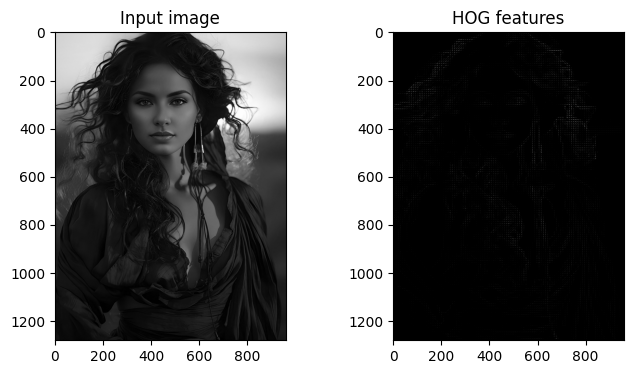

In [3]:
# Loading an example image
image_path = "../datasets/generated_image/1.jpg"
image = cv2.imread(image_path)
image_gray = color.rgb2gray(image) # Converting image to grayscale

# Extract HOG features
features, hog_image = hog(image_gray, orientations=9, pixels_per_cell=(9, 9),
                          cells_per_block=(5,5), visualize=True)

normalized_img = np.zeros_like(hog_image, dtype=np.uint8) # Create an empty array for the output
cv2.normalize(hog_image, normalized_img, 0, 255, cv2.NORM_MINMAX)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Input image')

plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG features')
plt.show()

In [31]:
print(hog_image)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03281094 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


1280
960


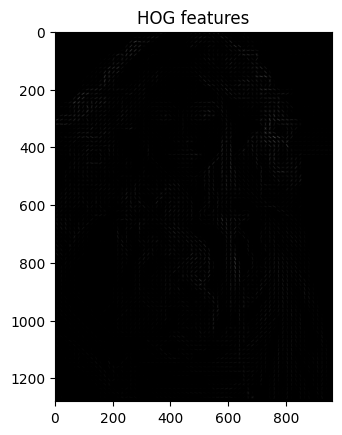

In [13]:
image_path = "../datasets/generated_image/1.jpg"
gen_image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

print(gray.shape[0])
print(gray.shape[1])
# Extract HOG features
features, hog_image = hog(image, orientations=8, pixels_per_cell=(15, 15),
                          cells_per_block=(1, 1), visualize=True, channel_axis=-1)

plt.imshow(hog_image, cmap='gray')
plt.title('HOG features')
plt.show()


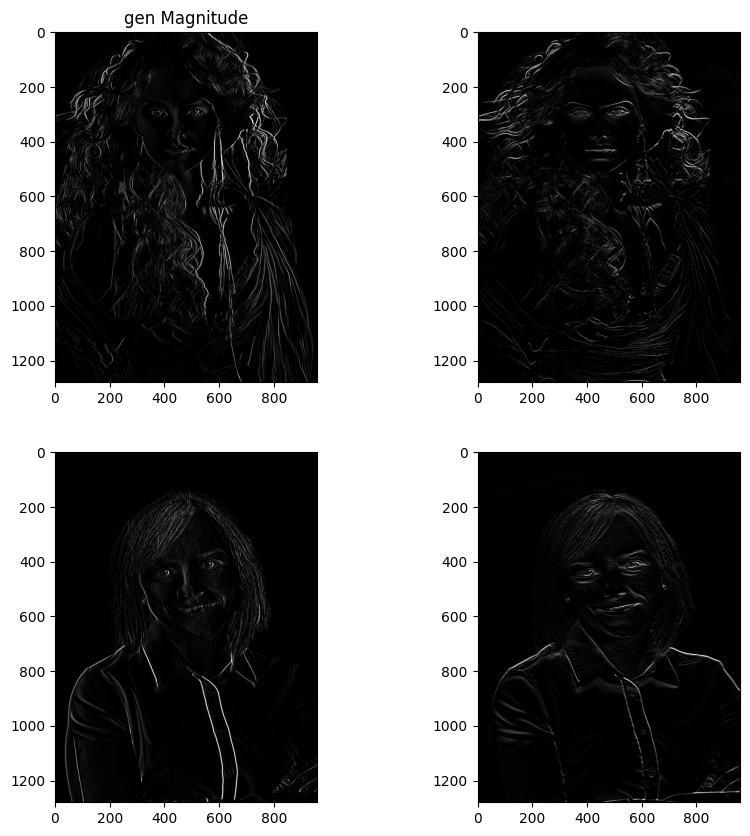

In [ ]:
gen_image_path = "../datasets/generated_image/1.jpg"
gen_image = cv2.imread(gen_image_path)
gen_gray = cv2.resize(cv2.cvtColor(gen_image, cv2.COLOR_BGR2GRAY), (960, 1280))

real_image_path = "../datasets/real_image/1.jpg"
real_image = cv2.imread(real_image_path)
real_gray = cv2.resize(cv2.cvtColor(real_image, cv2.COLOR_BGR2GRAY), (960, 1280))

Gx = np.array([[-1, 0, 1], 
                   [-2, 0, 2], 
                   [-1, 0, 1]])

Gy = np.array([[-1, -2, -1], 
                   [0, 0, 0], 
                   [1, 2, 1]])

filtered_gen_image_X = cv2.filter2D(gen_gray, -1, kernel=Gx)
filtered_gen_image_Y = cv2.filter2D(gen_gray, -1, kernel=Gy)
filtered_real_image_X = cv2.filter2D(real_gray, -1, kernel=Gx)
filtered_real_image_Y = cv2.filter2D(real_gray, -1, kernel=Gy)

fig, grid = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

grid[0][0].imshow(filtered_gen_image_X, cmap='gray')
grid[0][0].set_title("Gen Magnitude")
grid[0][1].imshow(filtered_gen_image_Y, cmap='gray')
grid[1][0].imshow(filtered_real_image_X, cmap='gray')
grid[1][1].imshow(filtered_real_image_Y, cmap='gray')

plt.show()

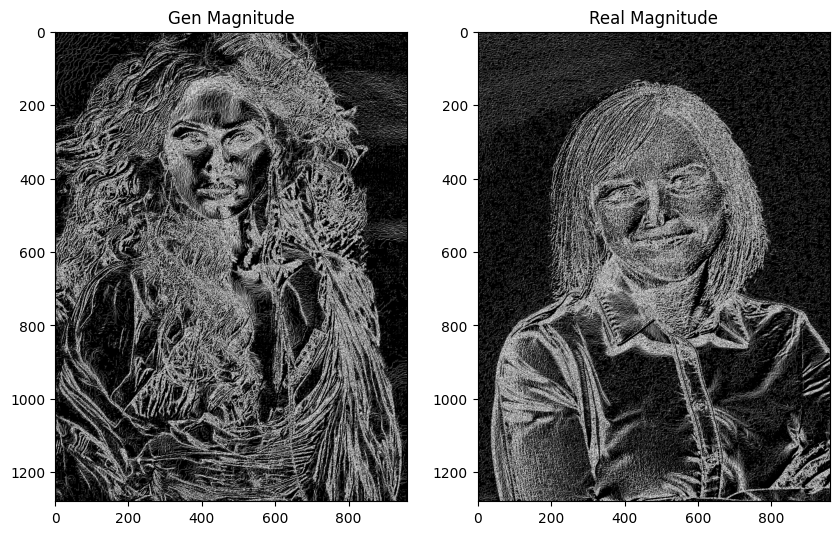

In [ ]:
gen_magnitude_matrix = np.sqrt(filtered_gen_image_X**2 + filtered_gen_image_Y**2)
real_magnitude_matrix = np.sqrt(filtered_real_image_X**2 + filtered_real_image_Y**2)

fig, grid = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

grid[0].imshow(gen_magnitude_matrix, cmap='gray')
grid[0].set_title("Gen Magnitude")
grid[1].imshow(real_magnitude_matrix, cmap='gray')
grid[1].set_title("Real Magnitude")

plt.show()

C:\Users\usEr\AppData\Local\Temp\ipykernel_35644\1927196262.py:1: RuntimeWarning: divide by zero encountered in divide
  gen_direction_matrix = np.arctan(filtered_gen_image_X / filtered_gen_image_Y)
C:\Users\usEr\AppData\Local\Temp\ipykernel_35644\1927196262.py:1: RuntimeWarning: invalid value encountered in divide
  gen_direction_matrix = np.arctan(filtered_gen_image_X / filtered_gen_image_Y)
C:\Users\usEr\AppData\Local\Temp\ipykernel_35644\1927196262.py:2: RuntimeWarning: divide by zero encountered in divide
  real_direction_matrix = np.arctan(filtered_real_image_X / filtered_real_image_Y)
C:\Users\usEr\AppData\Local\Temp\ipykernel_35644\1927196262.py:2: RuntimeWarning: invalid value encountered in divide
  real_direction_matrix = np.arctan(filtered_real_image_X / filtered_real_image_Y)


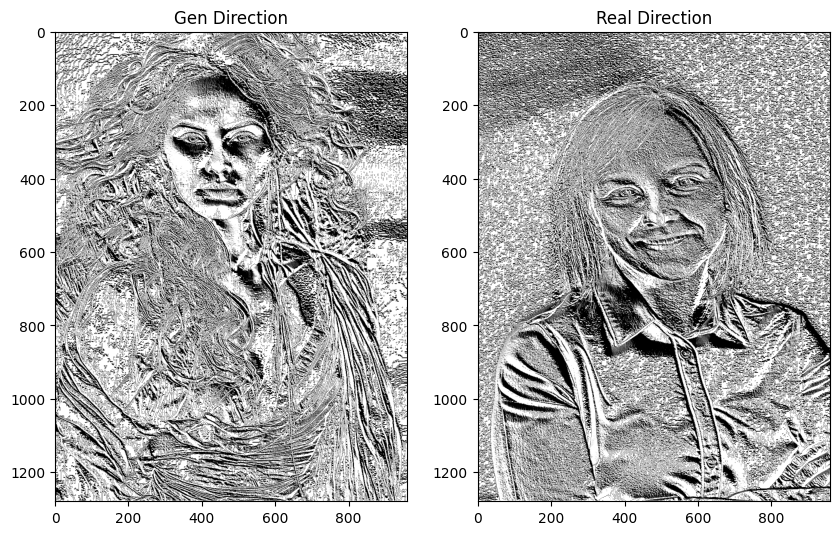

In [20]:
gen_direction_matrix = np.arctan(filtered_gen_image_X / filtered_gen_image_Y)
real_direction_matrix = np.arctan(filtered_real_image_X / filtered_real_image_Y)
fig, grid = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

grid[0].imshow(gen_direction_matrix, cmap='gray')
grid[0].set_title("Gen Direction")
grid[1].imshow(real_direction_matrix, cmap='gray')
grid[1].set_title("Real Direction")

plt.show()

In [94]:
hog_tensor = torch.tensor(features, dtype=torch.float32)

In [37]:
# Print the shape and data type of the tensor
print("HOG Tensor Shape:", hog_tensor.shape)
print("HOG Tensor Data Type:", hog_tensor.dtype)

HOG Tensor Shape: torch.Size([43520])
HOG Tensor Data Type: torch.float32


In [27]:
print(features[0])

0.5773502689490632



Create Data Loader

In [7]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import Adam
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [ ]:
data_dir = ''

In [ ]:
transform = transforms.Compose([
    
])